# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [2]:
#imports
from __future__ import division
from pandas.core import datetools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../Data_science_course/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [15]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [17]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Because the range of variation of the GPA goes from 0-4 and the GRE instead goes from 0-800

#### Question 4. Drop data points with missing data


In [4]:
df_nodup=df_raw.dropna()
df_nodup.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [46]:
null_data = df_raw[df_raw.isnull().any(axis=1)]
null_data

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Because now the counts are matching now and keeping the missing data only it is possible to see the actual rows 

#### Question 6. Create box plots for GRE and GPA

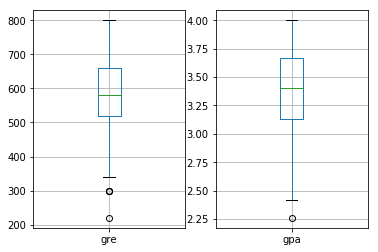

In [5]:
#boxplot 1

fig, axes = plt.subplots(1, 2)

df_nodup.boxplot('gre', ax=axes[0])
df_nodup.boxplot('gpa', ax=axes[1])

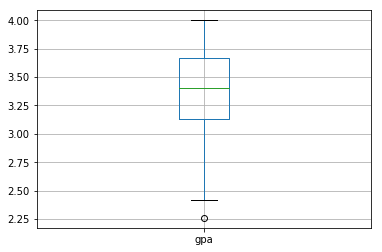

In [78]:
#boxplot 2 
df_nodup.boxplot('gpa')

#### Question 7. What do this plots show?

Answer: The median values and where is the majority of the data concentrated. In addition the outliers can be seen here too. 

#### Question 8. Describe each distribution 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c25cca250>],
      dtype=object)

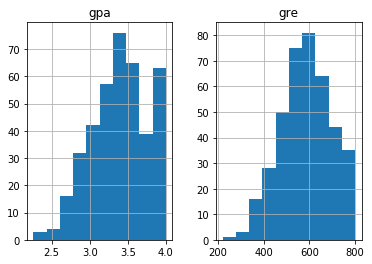

In [79]:
# plot the distribution of each variable 
fig, axes = plt.subplots(1, 2)

df_nodup.hist('gpa', ax=axes[0])
df_nodup.hist('gre', ax=axes[1])

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: it would be affirmative for the gre and in an approximate way for the gpa is skewed towards the right side with outliers in the max value

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes, there are outliers in the gpa one 

#### Question 11. Which of our variables are potentially colinear? 

             admit       gre       gpa  prestige
admit     1.000000  0.181202  0.174116 -0.243563
gre       0.181202  1.000000  0.382408 -0.124533
gpa       0.174116  0.382408  1.000000 -0.060976
prestige -0.243563 -0.124533 -0.060976  1.000000


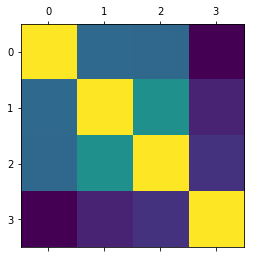

In [7]:
# create a correlation matrix for the data
print df_nodup.corr()

plt.matshow(df_nodup.corr())

#### Question 12. What did you find?

Answer: That all the variables are independent and are not linearly correlated

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 
1.- Loading Data 
2.-Exploratory analysis 
3.-Validating data 
4.-Deciding what to do with missing values 
5.-Checking correlations

#### Question 14. What is your hypothesis? 

Answer: That the rank, and scores from GPA and GRE will determine if you will be admitted to college 


## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data